# Bank Custommer Churn

In [1]:
#Import Necessary lbraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Bank customer churn data.csv")
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


###  Exploratory Data Analysis (EDA)

In [3]:
#Description of data
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
# Check Null Values

df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [5]:
#Checking Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


0    7963
1    2037
Name: churn, dtype: int64


Text(0, 0.5, 'Customers')

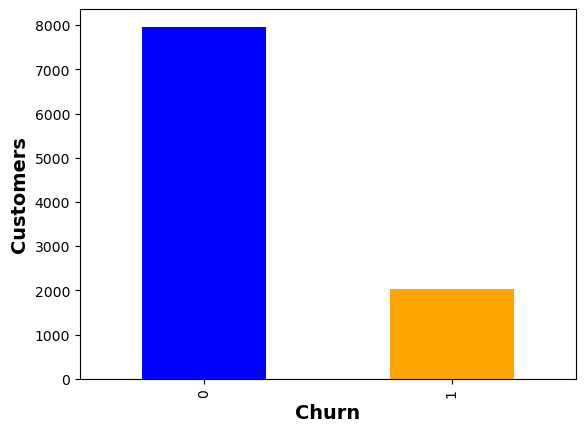

In [6]:
#Counting 1 and 0 Value in Churn column
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = df["churn"].map(lambda x: color_wheel.get(x + 1))
print(df.churn.value_counts())
p = df.churn.value_counts().plot(kind="bar", color=["blue", "orange"])

plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi']= 500
plt.xlabel('Churn', fontsize = 14, fontweight= 'bold')
plt.ylabel('Customers', fontsize = 14, fontweight = 'bold')

###  Feature Engineering

In [7]:
#Change value in country column
df['country'] = df['country'].replace(['Germany'],'0')
df['country'] = df['country'].replace(['France'],'1')
df['country'] = df['country'].replace(['Spain'],'2')
#Change value in gender column
df['gender'] = df['gender'].replace(['Female'],'0')
df['gender'] = df['gender'].replace(['Male'],'1')

In [8]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,1,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,1,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df['country'].dtypes

dtype('O')

In [10]:
#convert object data types column to integer
df['country'] = pd.to_numeric(df['country'])
df['gender'] = pd.to_numeric(df['gender'])
df.dtypes

customer_id           int64
credit_score          int64
country               int64
gender                int64
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [11]:
#Remove customer_id column
df2 = df.drop('customer_id', axis=1)
df2.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,1,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,1,0,42,8,159660.80,3,1,0,113931.57,1
3,699,1,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


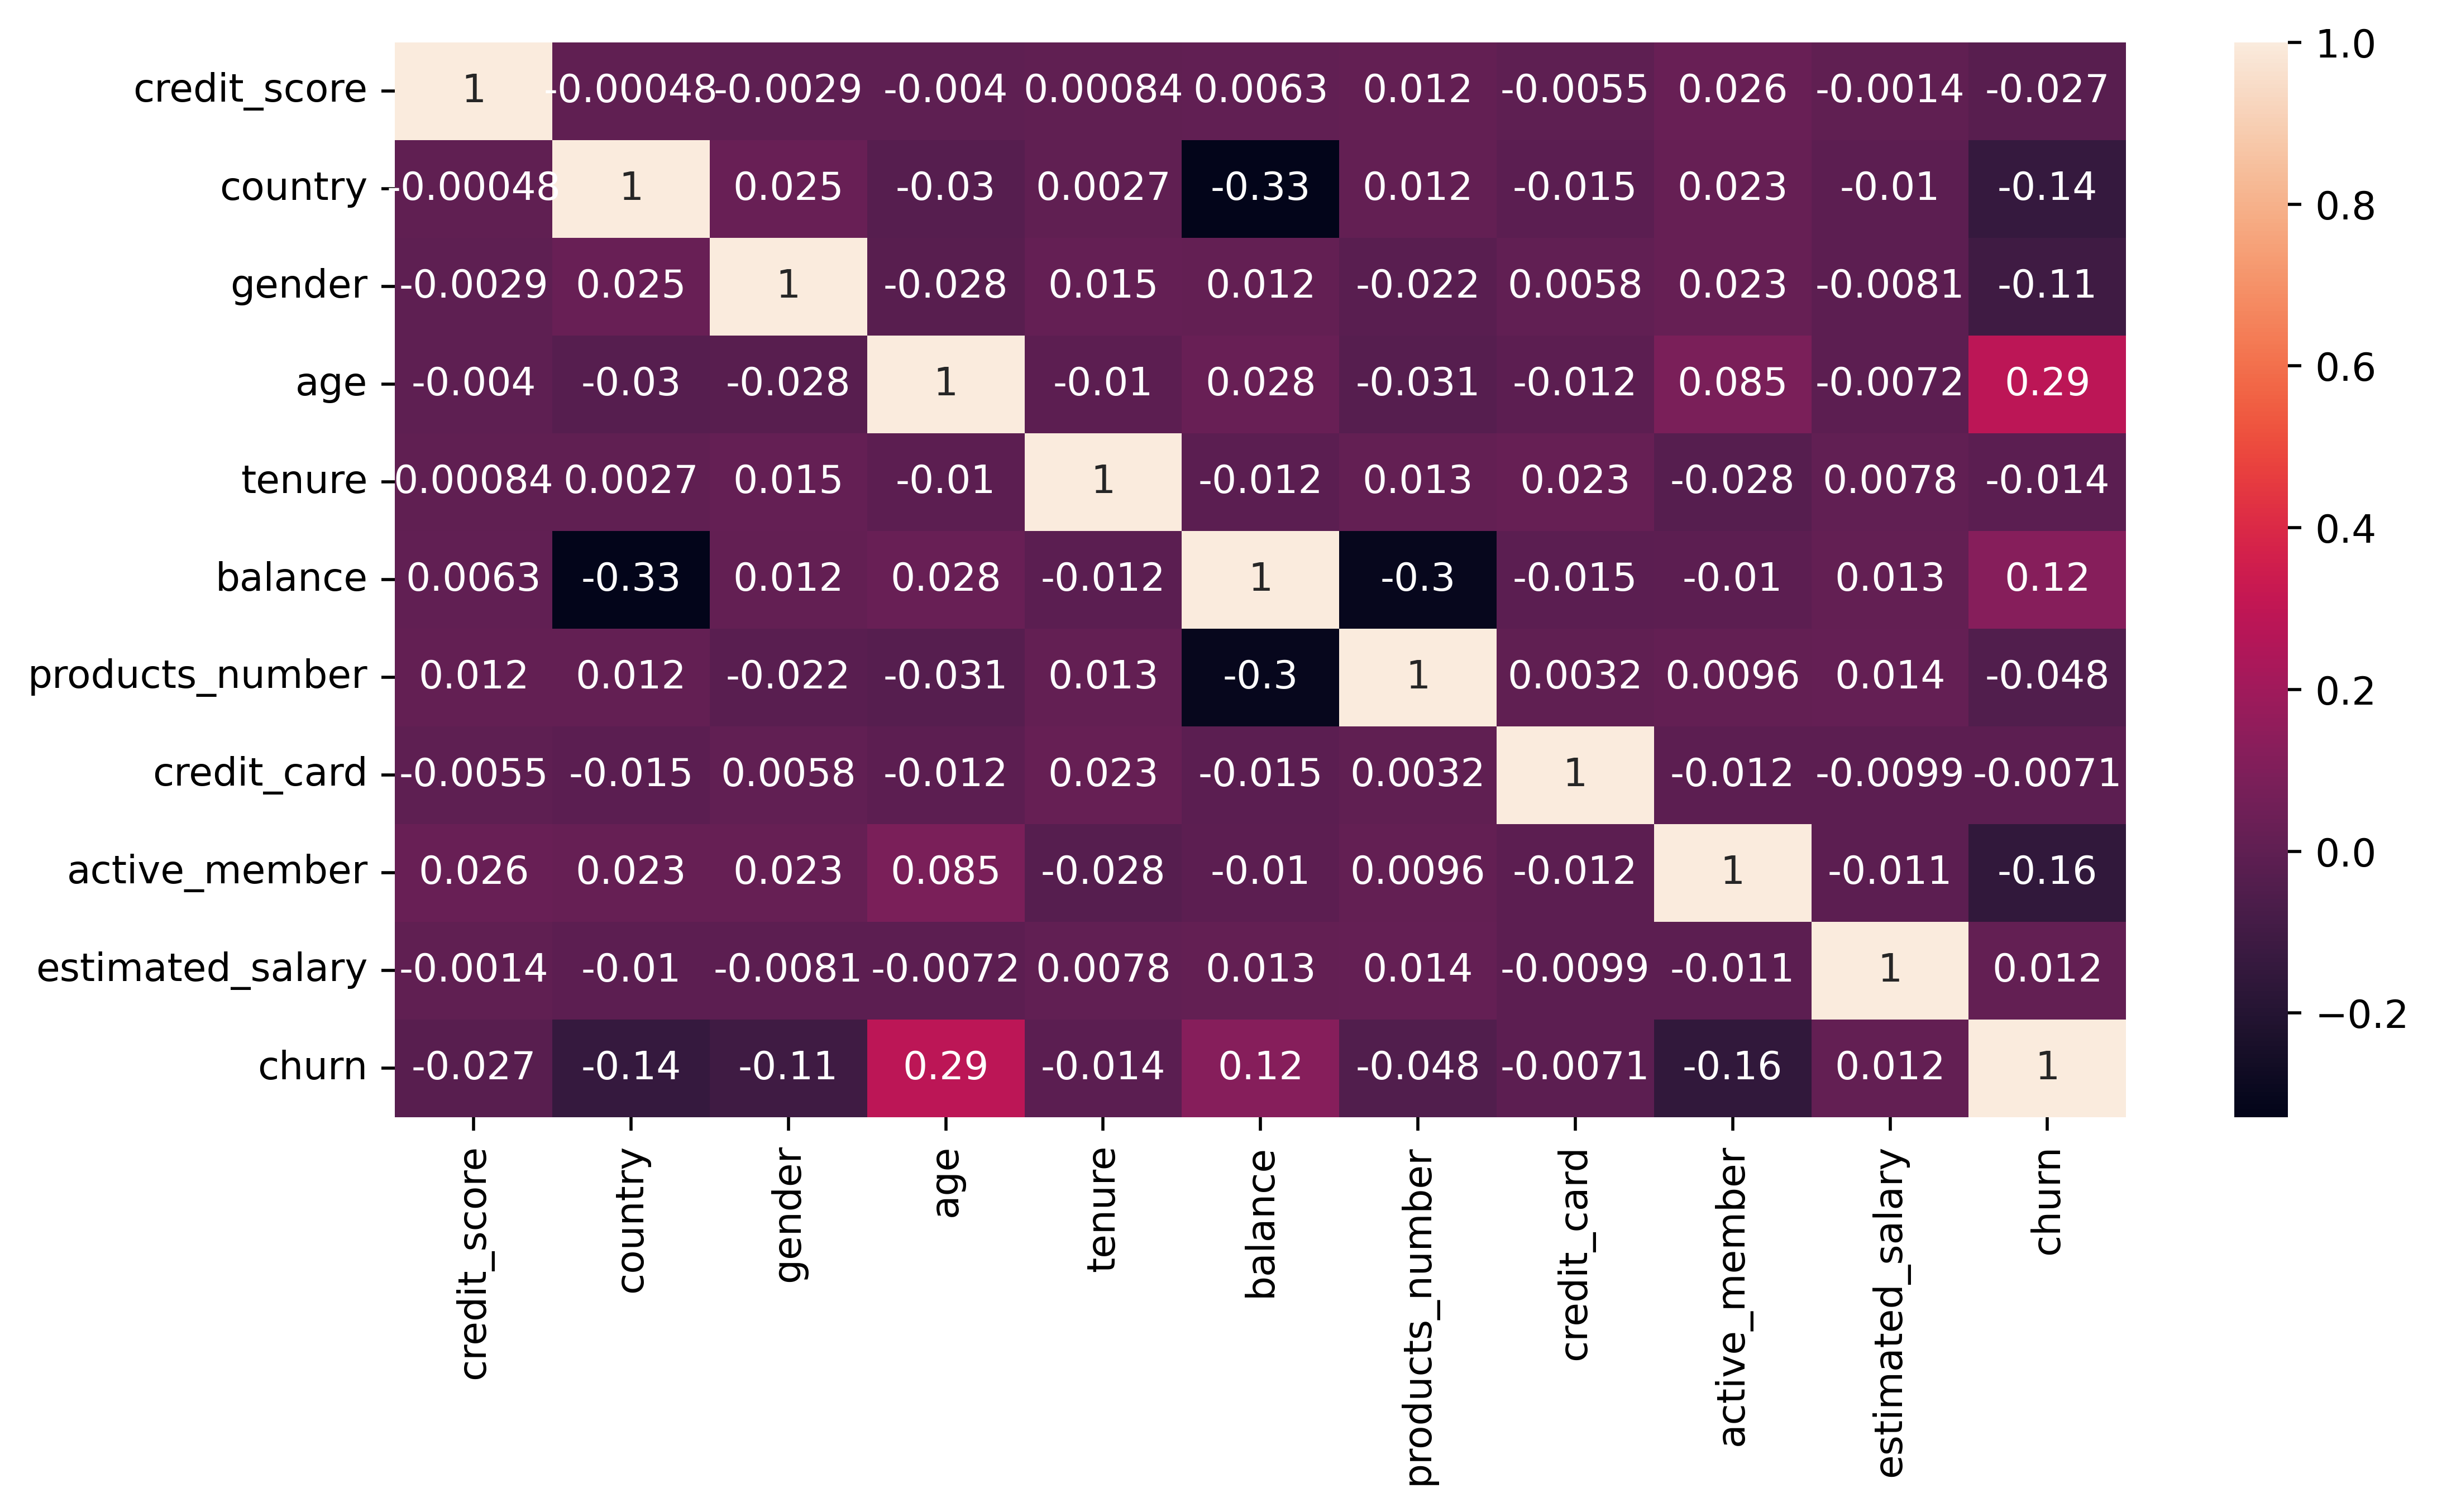

In [12]:

sns.heatmap(df2.corr(), fmt='.2g', annot= True, )
plt.rcParams['figure.figsize']= (10,8)

## Model Building

In [13]:
X = df2.drop('churn', axis=1)
y = df2['churn']

In [14]:
#test size 20% and train size 80%

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=7)

In [16]:
X_train

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
4989,629,1,1,40,9,0.00,1,1,0,106.67
4498,570,1,1,30,2,131406.56,1,1,1,47952.45
8876,556,2,1,46,3,131764.96,1,1,1,108500.66
670,624,0,0,48,3,122388.38,2,0,0,30020.09
9552,664,1,0,41,5,0.00,1,1,1,152054.33
...,...,...,...,...,...,...,...,...,...,...
919,552,2,1,45,9,0.00,2,1,0,26752.56
4307,770,2,1,46,9,190678.02,1,1,1,14725.36
5699,684,1,1,35,6,135871.50,1,1,1,87219.41
537,686,2,1,34,9,0.00,2,1,0,127569.80


In [17]:
X_test

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
1977,717,2,1,35,1,0.00,3,0,0,174770.14
3880,677,1,0,72,8,0.00,2,1,1,153604.44
52,788,1,0,33,5,0.00,2,0,0,116978.19
2551,537,1,0,53,3,0.00,1,1,1,91406.62
2246,717,2,0,39,6,0.00,2,1,0,93275.61
...,...,...,...,...,...,...,...,...,...,...
9505,651,1,1,28,10,79562.98,1,1,1,74687.37
2836,679,1,1,60,8,0.00,2,1,1,51380.90
1169,653,1,0,38,8,102133.38,1,1,1,166520.96
9929,755,0,1,38,4,111096.91,1,1,1,19762.88


In [18]:
y_train

4989    0
4498    0
8876    1
670     0
9552    0
       ..
919     0
4307    0
5699    0
537     0
9412    0
Name: churn, Length: 8000, dtype: int64

In [19]:
X_test.shape, y_test.shape

((2000, 10), (2000,))

## Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 78.55 %


## Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 86.5 %


## Support Vector Machine

In [22]:
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 79.45 %


## XGBoost

In [23]:
# pip install xgboost

In [24]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
print("Accuracy Score :", accuracy_score(y_test, y_pred)*100, "%")

Accuracy Score : 85.15 %


# Visualize Random Forest and XGBoost Algorithm because Random Forest and XGBoost Algorithm have the Best Accuracy

In [25]:
#importing classification report and confusion matrix from sklearn

from sklearn.metrics import classification_report, confusion_matrix
#Random Forest
y_pred = rfc.predict(X_test)
print("Classification report - n", classification_report(y_test,y_pred))

Classification report - n               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1589
           1       0.78      0.48      0.59       411

    accuracy                           0.86      2000
   macro avg       0.83      0.72      0.76      2000
weighted avg       0.86      0.86      0.85      2000



Text(0.5, 1.0, 'Accuracy Score: 0.865')

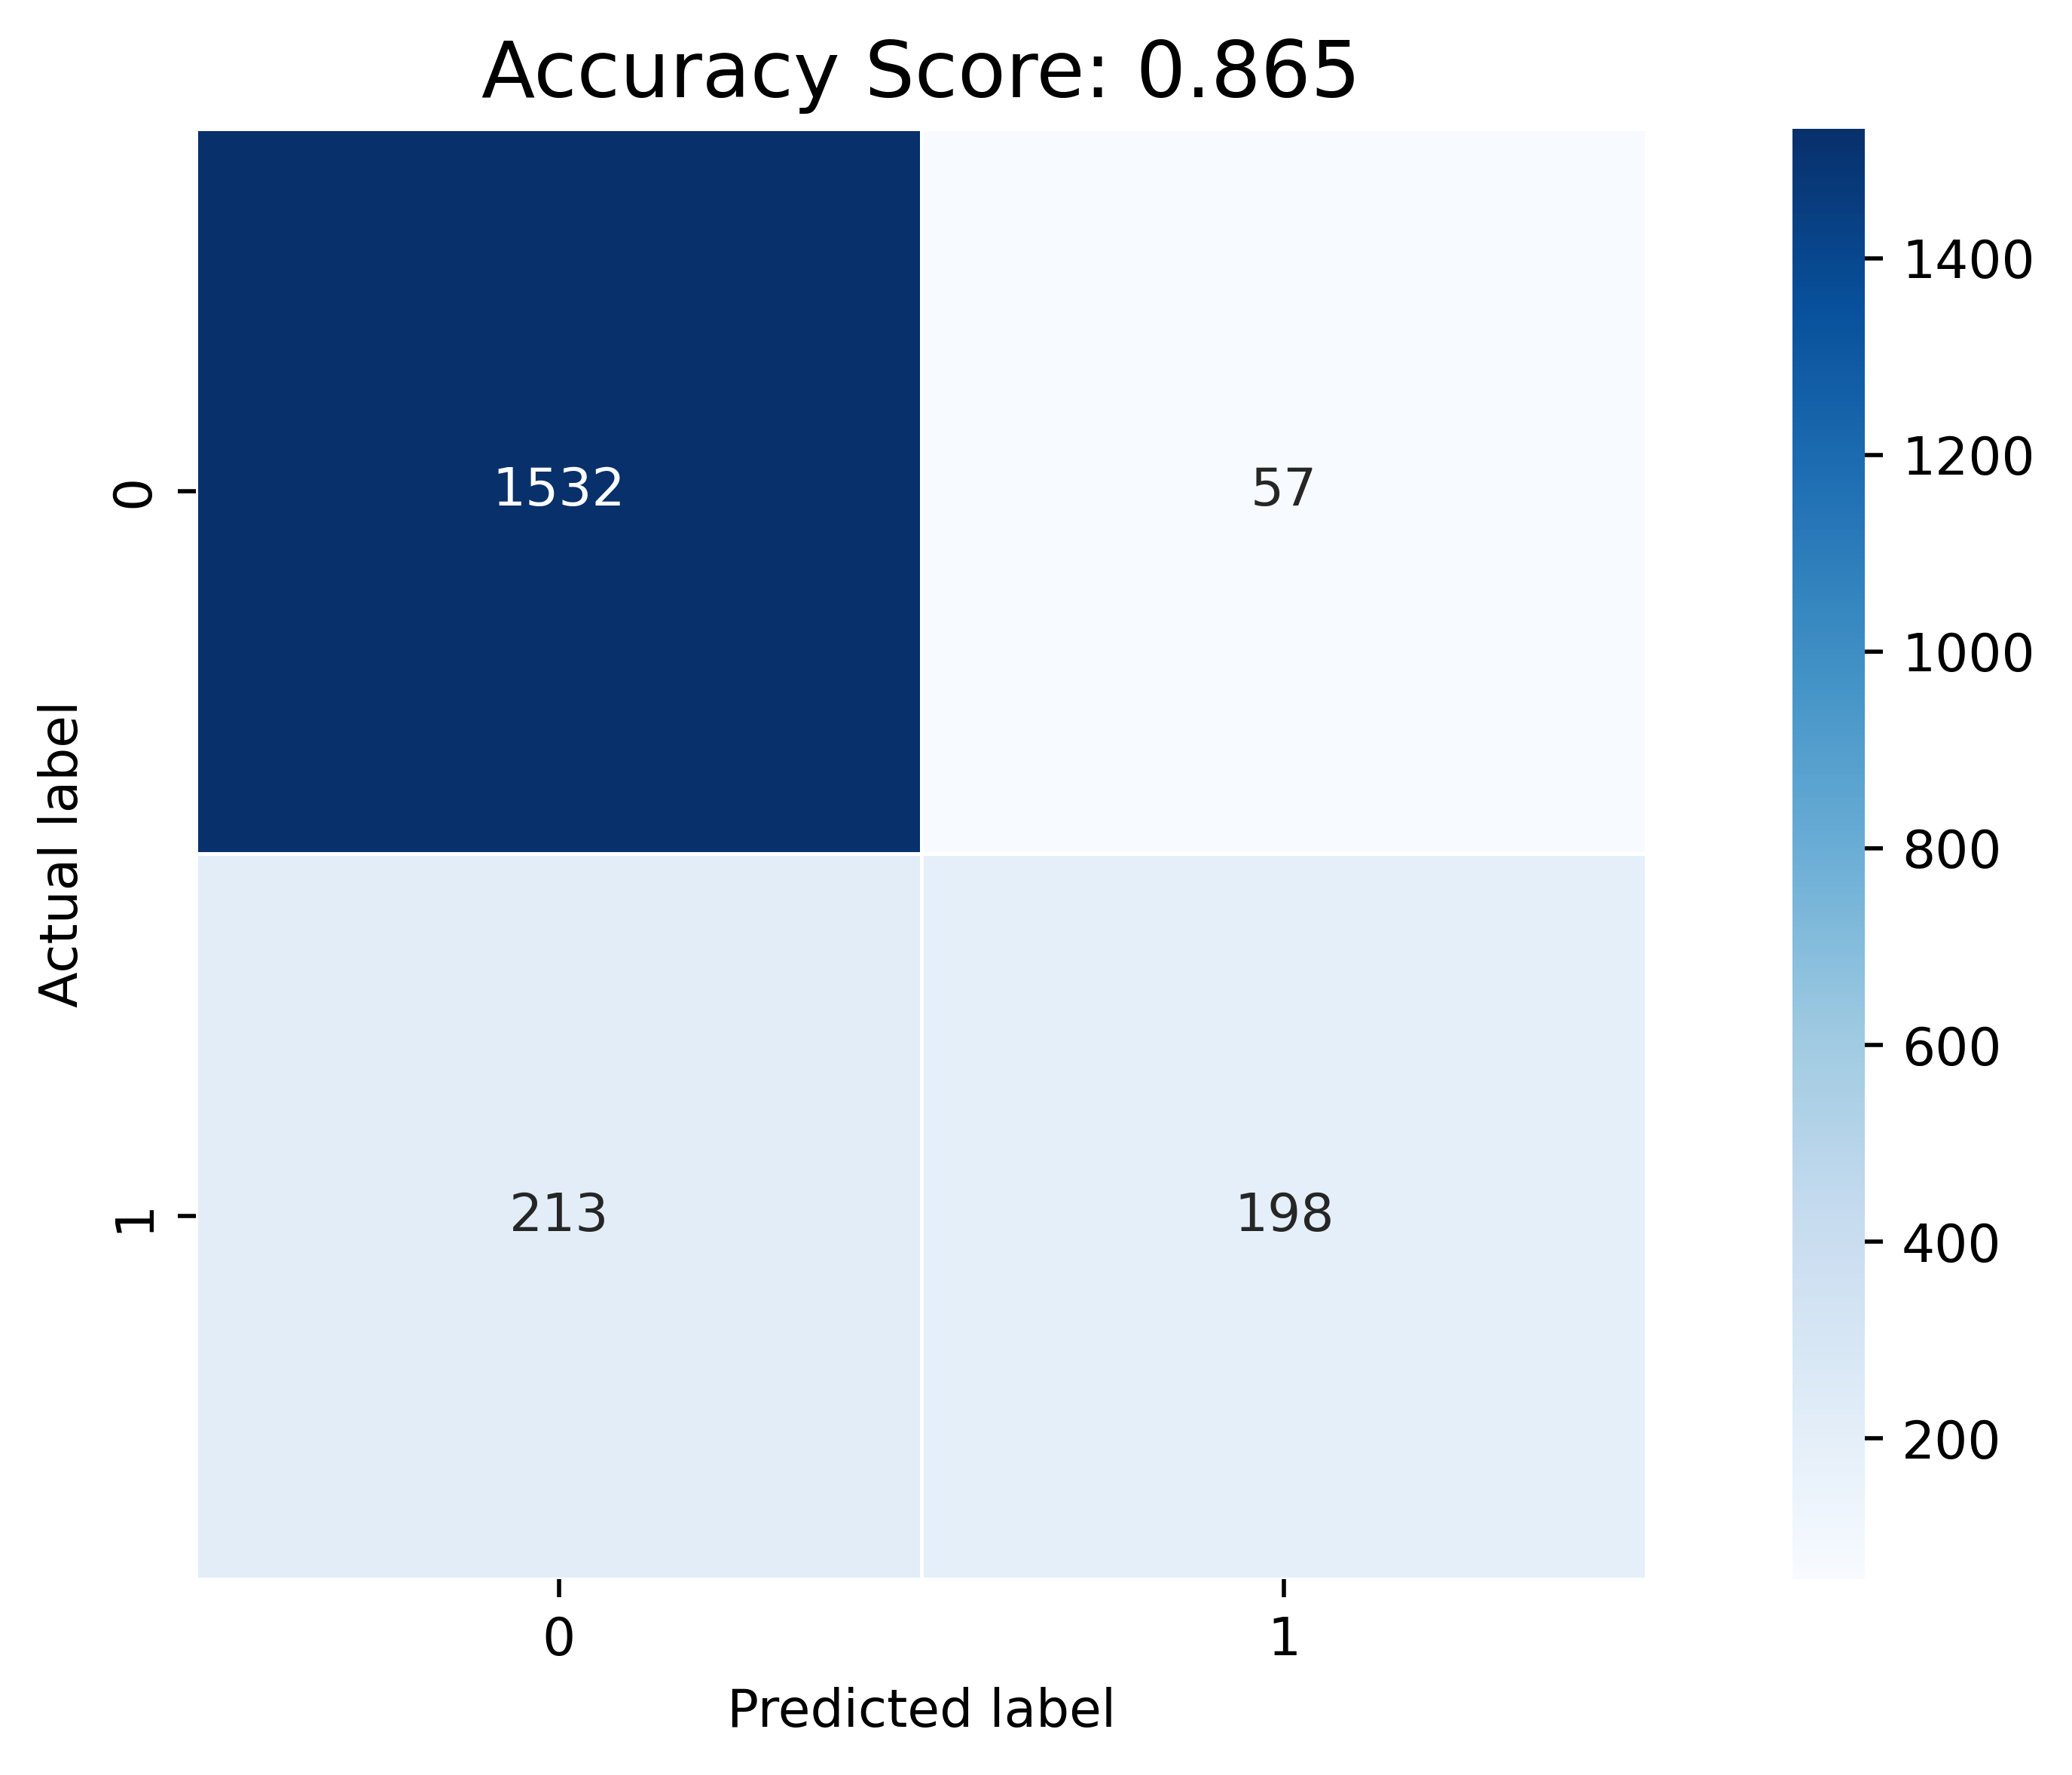

In [26]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues', fmt= '0.5g')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(rfc.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

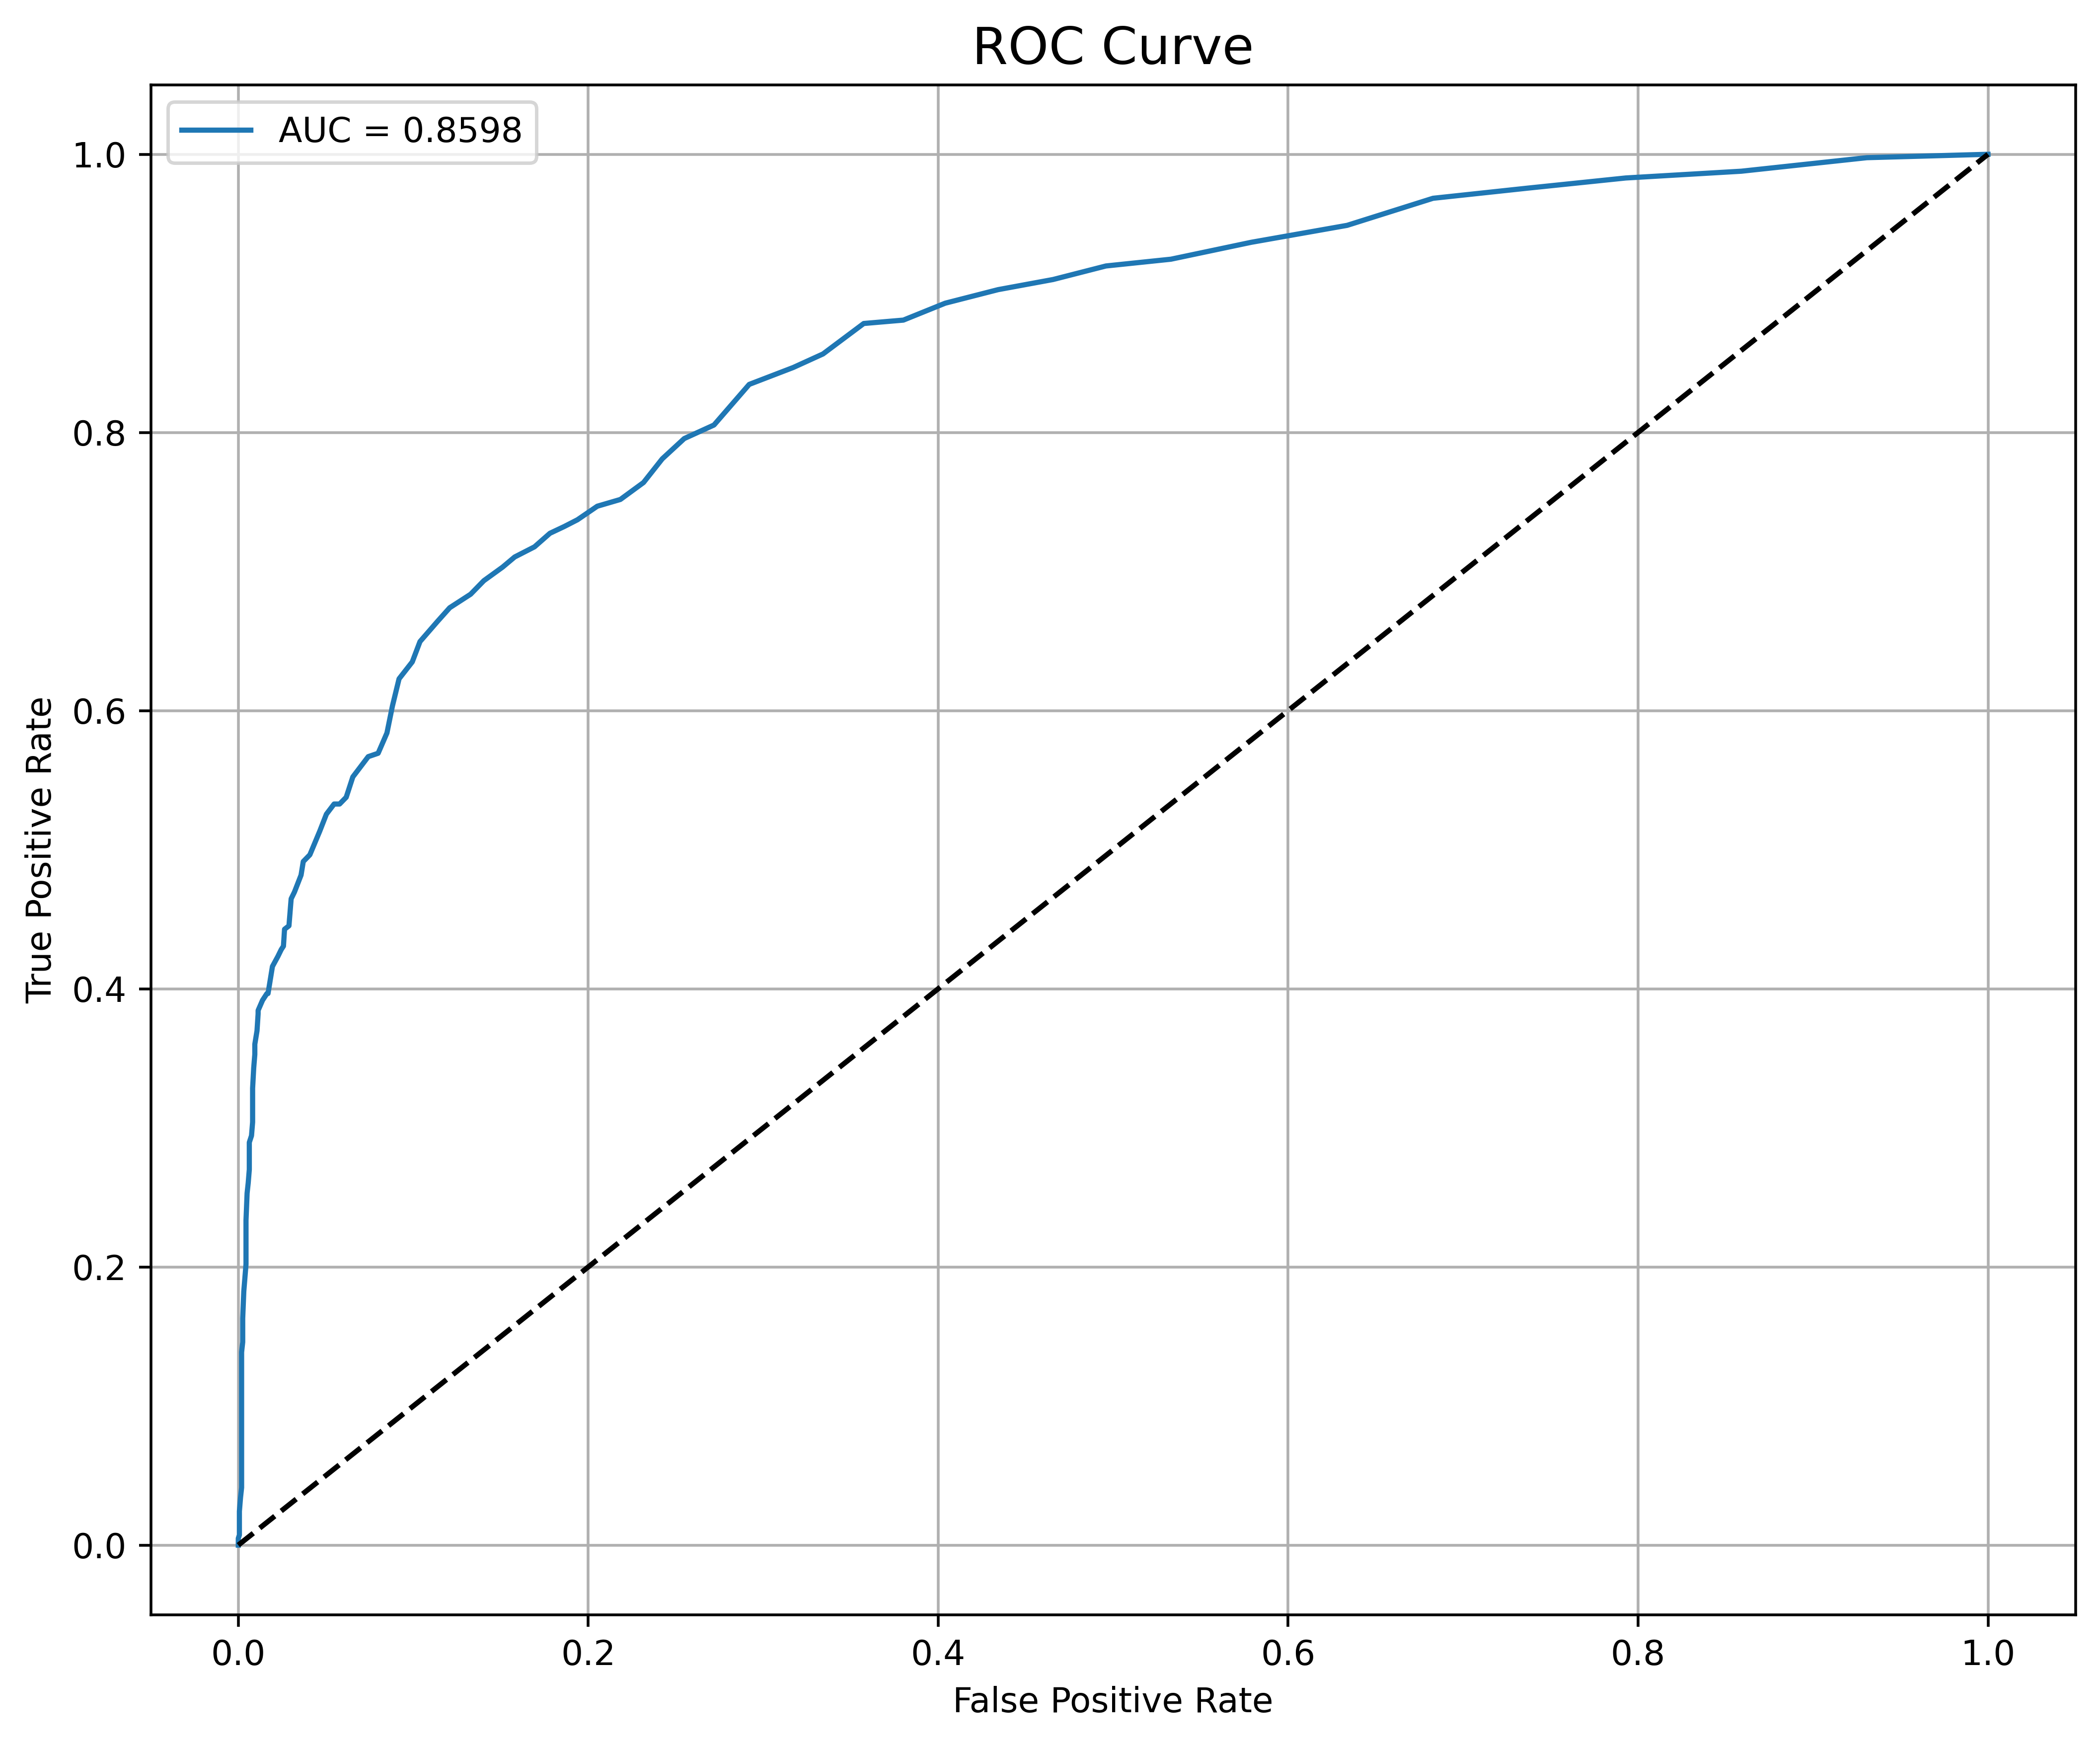

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]
df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()
plt.grid()

# XGBoost

In [28]:
y_pred = xgb_model.predict(X_test)
print("Classification report - n", classification_report(y_test,y_pred))

Classification report - n               precision    recall  f1-score   support

           0       0.87      0.95      0.91      1589
           1       0.71      0.47      0.57       411

    accuracy                           0.85      2000
   macro avg       0.79      0.71      0.74      2000
weighted avg       0.84      0.85      0.84      2000



Text(0.5, 1.0, 'Accuracy Score: 0.8515')

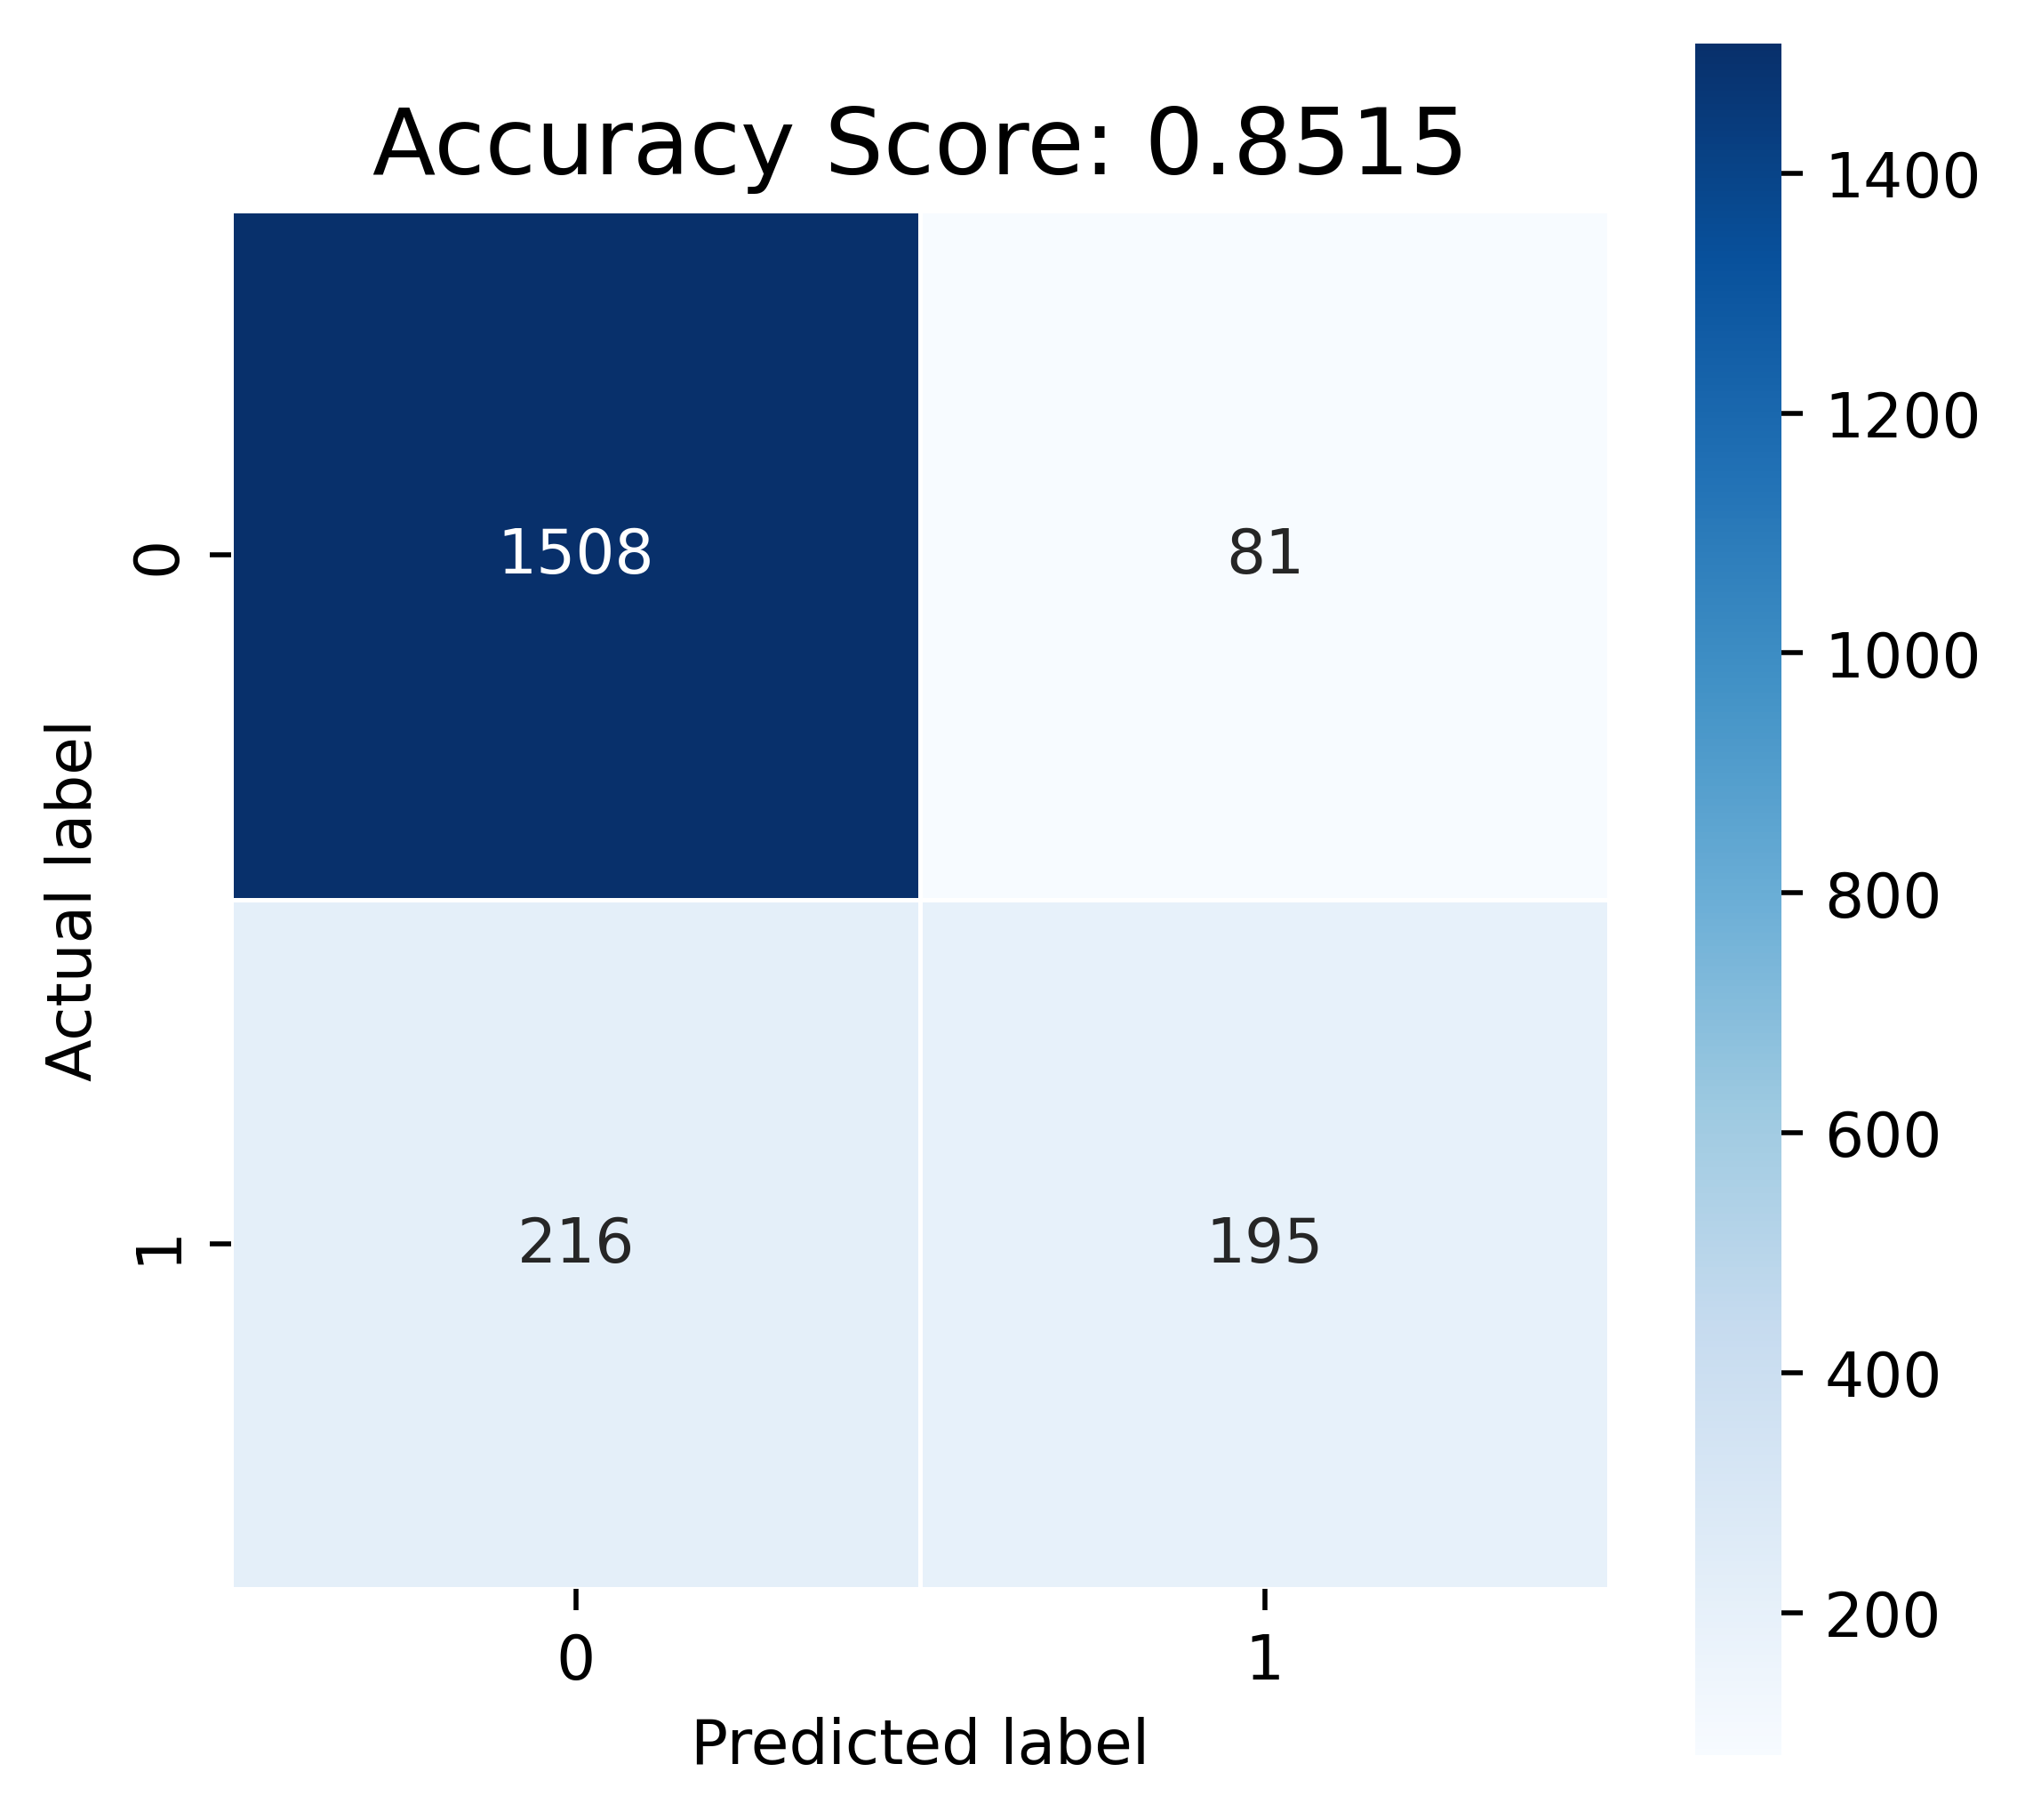

In [29]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues', fmt= '0.5g')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(xgb_model.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

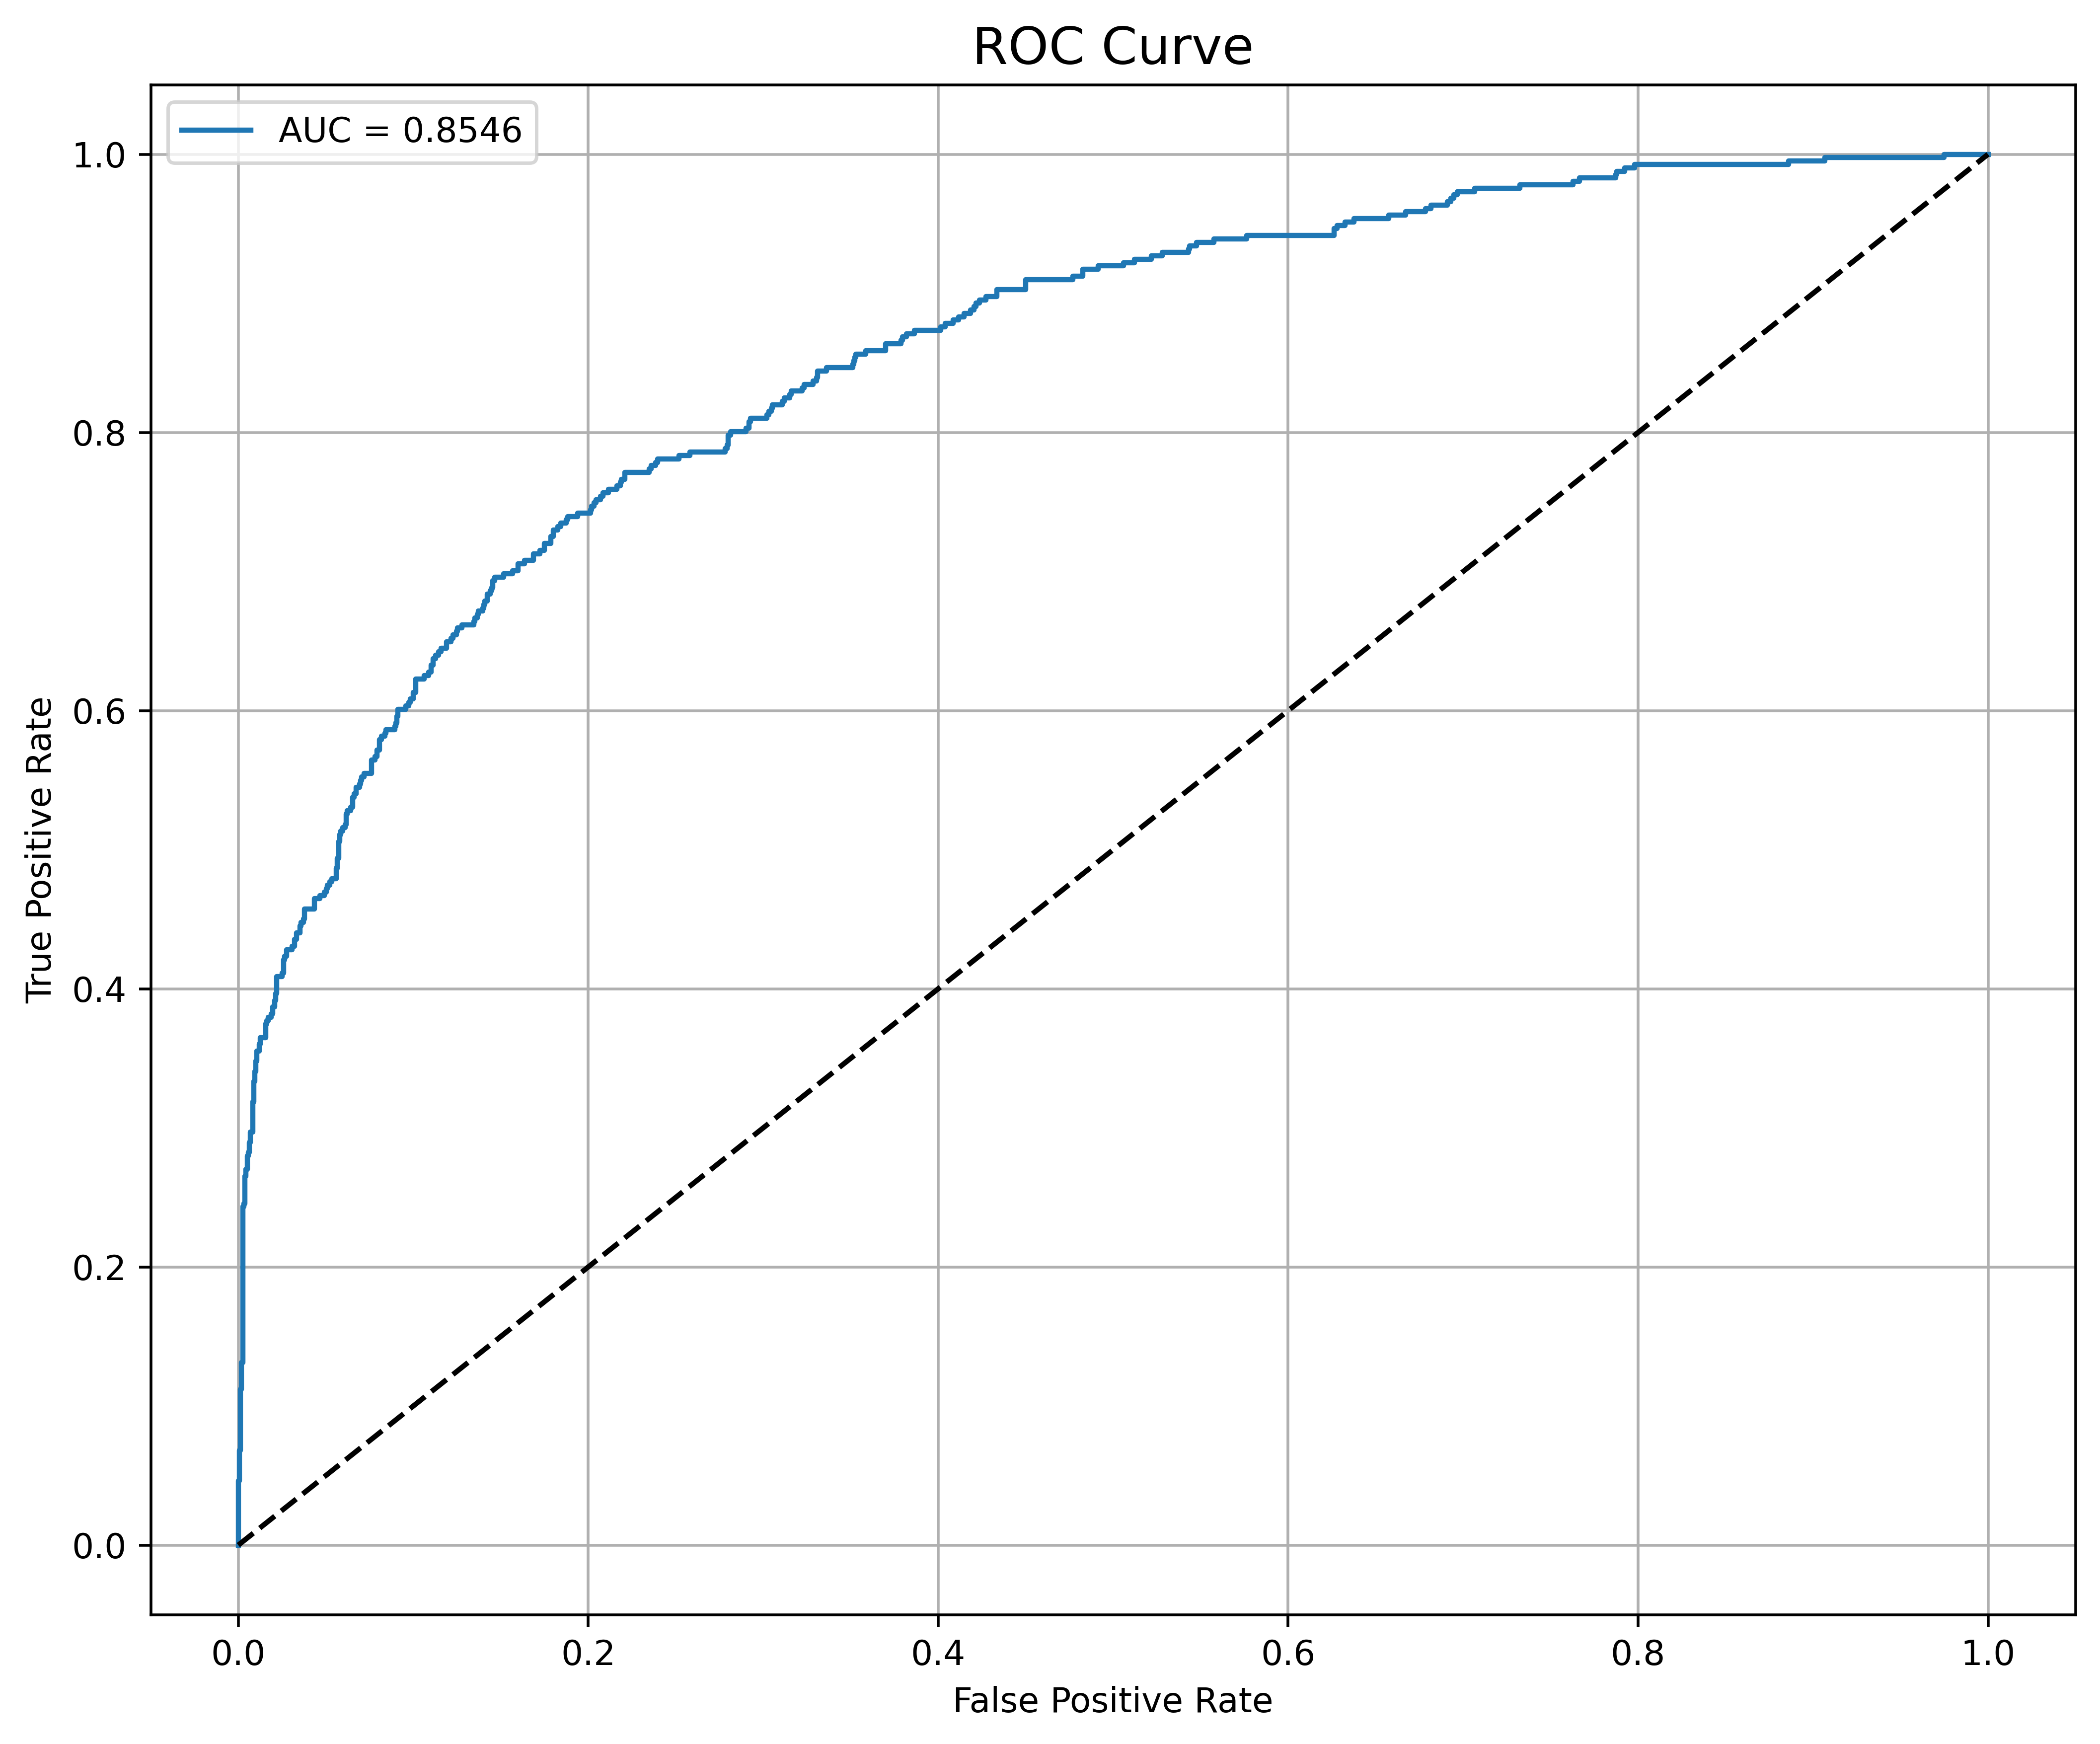

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = xgb_model.predict_proba(X_test)[:][:,1]
df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()
plt.grid()

In [31]:
xgb_model.score(X_train,y_train), xgb_model.score(X_test,y_test)

(0.953375, 0.8515)

- Traning Accuracy is Greater than testing Accuracy, The model is Over fitting.
- So we need to do hyperparamert Tuning

# Conclusion

The churn variable has imbalanced data. So, the solution to handle imbalanced data are :

Resample Training set
Use K-fold Cross-Validation in the Right Way
Ensemble Different Resampled Datasets
We have to change the value in the Country and Gender columns so the Machine Learning model can read and predict the dataset; after changing the value, we have to change the data types on the Country and Gender column from string to integer because XGBoost Machine Learning Model cannot read string data types even though the value in the column is number.

Lastly, XGBoost and Random Forest are the best algorithms to predict Bank Customer Churn since they have the highest accuracy (86,85% and 86.45%). Random Forest and XGBoost have perfect AUC Scores. They have 0.8731 and 0.8600 AUC Scores.

# Hyperparameter Tuning

In [32]:
params ={
    'learning_rate'   : [0.05,0.10,0.15,0.20,0.25,0.30],
    'max_depth'       : [3,4,5,6,7,8,9,10,11],
    'min_child_weight' : [1,3,5,7],
    'gamma'           : [0.0,0.1,0.2,0.3,0.4],
    'colsample_bytree' : [0.2,0.3,0.4,0.5,0.6,0.7]
}

In [33]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [34]:
XGBClassifier()

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [35]:
random_cv = RandomizedSearchCV(estimator=XGBClassifier(),
                               param_distributions= params,
                               n_iter=50,
                               scoring='roc_auc',
                               n_jobs=-1,
                               cv=5,
                               verbose=0)


In [36]:
random_cv.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10,
                                                      11],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc')

In [37]:
random_cv.best_params_

{'min_child_weight': 3,
 'max_depth': 5,
 'learning_rate': 0.05,
 'gamma': 0.2,
 'colsample_bytree': 0.6}

In [38]:


classifier = XGBClassifier(objective='binary:logistic', min_child_weight=3, max_depth=6, learning_rate=0.1, gamma=0.1, colsample_bytree=0.3)



- You have to convert the dataframe into arrays and then train the model.

In [39]:
X_matrix = X_train.values
y_matrix = y_train.values

In [40]:
classifier.fit(X_matrix,y_matrix)

y_pred = classifier.predict(X_test)

In [41]:
print('Training Accuracy is;' , classifier.score(X_train,y_train))
print('Testing Accuracy is;' , classifier.score(X_test,y_test))

Training Accuracy is; 0.89
Testing Accuracy is; 0.8635


####  The Model Is Generalized

In [42]:
from sklearn.model_selection import cross_val_score

In [43]:
random_cv.best_score_

0.862663395770767